### Shivani Manish Doiphode: Descriptive Analysis

### Food and Nutrition
***

![Nutrition Image](https://images.unsplash.com/photo-1498837167922-ddd27525d352?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=750&q=80)

Food and nutrition are the way that we get fuel, providing energy for our bodies. We need to replace nutrients in our bodies with a new supply every day. Water is an important component of nutrition. Fats, proteins, and carbohydrates are all required.Nutrition is the science that interprets the nutrients and other substances in food in relation to maintenance, growth, reproduction, health and disease of an organism. It includes ingestion, absorption, assimilation, biosynthesis, catabolism and excretion.


Knowing and eating mindfully is not only essential for a healthy gut but also for peace of mind. Also,A diet filled with vegetables, fruits and whole grains could help prevent major conditions such as stroke, diabetes and heart disease.More often than not, we like to gorge on our favourite foods which are not exactly the best for our bodies.While it is okay for such binges to occur occasionally, such diets can be extremely harmful if the person does not strike a balance with healthy foods. 

This notebook analyses the most common available foods and the nutritional facts in them.
***

### Descriptive Questions
***
Easy														
> Q1. Clean the data to deal with the 't' <br>														
> Q2. Use typecasting where ever required to further clean the data.	<br>													
> Q3. What is the most protein rich food in the category of vegetables and grains?			<br>											
														
Mild														
> Q4.Which foods to stay away from if one is trying to lose weight(avoid calorie dense foods)<br>														
> Q5. Analyze meat, poultry , seafood with the help of a pie chart	<br>													
> Q6. Calculate the total fat content of all foods in the dataset.		<br>												
														
Medium														
> Q7. Find the ingredient which has the most protein to calorie ratio.			<br>											
> Q8. Kylie Jenner's daily diet is : Milk skim, Hydrogenated cooking fat, Cod, Red kidney, Bouillon. What percentage of the diet is composed of saturated fats?			<br>											
> Q9. List foods that do not contain any common allergens (e.g., peanuts, tree nuts, dairy)		<br>												
> Q10. Which according to your analysis is the healthiest food item/s for a teenager?	<br>
***

***

In [56]:
# importing packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nutrients = pd.read_excel("C:\\Users\\doiph\\OneDrive\\Desktop\\Group7_Nutrition_Food.xlsx")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


***

#### Q1. Clean the data to deal with the 't'

##### Data Cleaning
Data cleaning is always the first step in any data science project. Although the data here seems clean, some minor alterations are required.

In [57]:
# First things first, the t's in the data denote miniscule amounts so we might as well replace them by 0.

# Replace "t" with 0
nutrients = nutrients.replace("t", 0)

# Replace "t'" with 0
nutrients = nutrients.replace("t'", 0)

# Display the first few rows of the DataFrame after replacement
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36.0,0,48.0,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0.0,0,52.0,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4.0,0,13.0,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18.0,0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23.0,1.4,119.0,Dairy products


In [58]:
# Now, we need to remove all the expressions like commas from the dataset so as to convert the numerical data to the respective integer or float variables.

# Replace commas (",") with empty strings ("") using regular expressions
nutrients = nutrients.replace(",", "", regex=True)

# Remove the letter "a" from the 'Fiber' column using regular expressions
nutrients['Fiber'] = nutrients['Fiber'].replace("a", "", regex=True)

# Calculate and set a new value for the 'Calories' column at index 91
nutrients['Calories'][91] = (8 + 44) / 2

C:\Users\doiph\AppData\Local\Temp\ipykernel_20724\2839831080.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nutrients['Calories'][91] = (8 + 44) / 2


***

#### Q2. Use typecasting where ever required to further clean the data.

In [59]:
# Now, let us convert grams, calories, protein, fat, saturated fat, fiber and carbs datatypes to int.

nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [60]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [61]:
print("All our data is in desired datatypes")

All our data is in desired datatypes


##### Quick last checks on data quality

In [62]:
print(nutrients.isnull().any())
print(nutrients.describe())

print("There's a null value in the fiber column, lets drop that row entirely")

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.000000   
max    1419.000000  1373.000000  232.000000  233.000000  234.000000   

            Fiber       Carbs  
count  334.000000  335.000000  
mean     2.376078   24.982388  
std     16.078272   35.833106  
min      0.000000    0.000000  
25%     

In [63]:
nutrients=nutrients.dropna()
nutrients.shape

(331, 10)

***

#### Q3. What is the most protein rich food in the category of vegetables and grains?

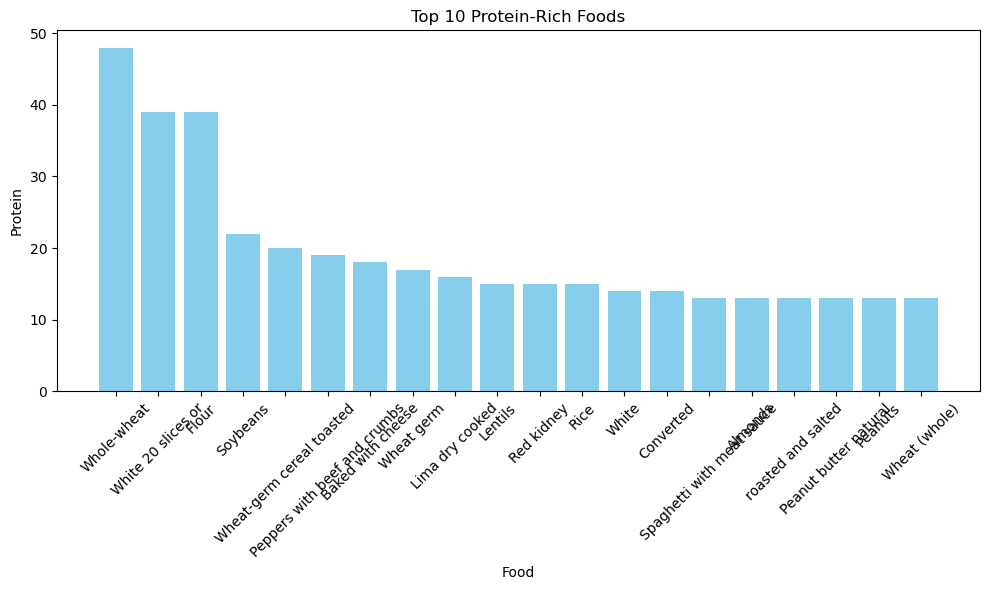

Therefore, from the category of Grains, Vegetables and Seeds, whole wheat has the most protein content followed by white bread. Soybeans are also in the top 20s. Also, Almonds rank no. 1 in the Seeds category.


In [64]:
# Define a list of categories called 'alls' that represent different types of foods
alls = ['Vegetables A-E', 'Vegetables F-P', 'Vegetables R-Z', 'Breads cereals fastfoodgrains', 'Seeds and Nuts']

# Filter the 'nutrients' DataFrame to select food items whose 'Category' is in the 'alls' list
prot = nutrients[nutrients['Category'].isin(alls)]

# Sort the filtered DataFrame 'prot' by 'Protein' content in descending order to find protein-rich foods
protein_rich = prot.sort_values(by='Protein', ascending=False)

# Select the top 20 protein-rich foods from the sorted DataFrame
top_20 = protein_rich.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))  # Optional: specify figure size
plt.bar(top_20['Food'], top_20['Protein'], color='skyblue')  # Specify color

# Add labels and title
plt.xlabel('Food')
plt.ylabel('Protein')
plt.title('Top 10 Protein-Rich Foods')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.tight_layout()  # Optional: adjust layout for better display
plt.show()

print("Therefore, from the category of Grains, Vegetables and Seeds, whole wheat has the most protein content followed by white bread. Soybeans are also in the top 20s. Also, Almonds rank no. 1 in the Seeds category.")

***

#### Q4.Which foods to stay away from if one is trying to lose weight(avoid calorie dense foods)

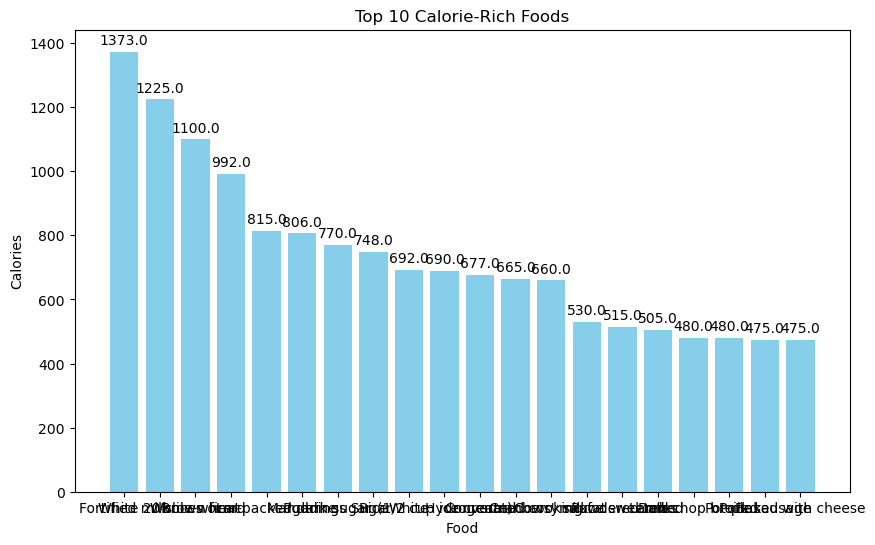

Fortified milk has the most calories, followed by white bread.


In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort the DataFrame by 'Calories' in descending order and select the top 20
cals = nutrients.sort_values(by='Calories', ascending=False)
top_20_cals = cals.head(20)

# Create a bar chart for the top 20 calorie-rich foods
plt.figure(figsize=(10, 6))  # Optional: specify figure size
bars = plt.bar(top_20_cals['Food'], top_20_cals['Calories'], color='skyblue')  # Specify color

# Add labels and title
plt.xlabel('Food')
plt.ylabel('Calories')
plt.title('Top 10 Calorie-Rich Foods')

# Add data labels above the bars (optional)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Display the chart
plt.show()

print("Fortified milk has the most calories, followed by white bread.")

***

#### Q5. Analyze meat, poultry , seafood with the help of a pie chart

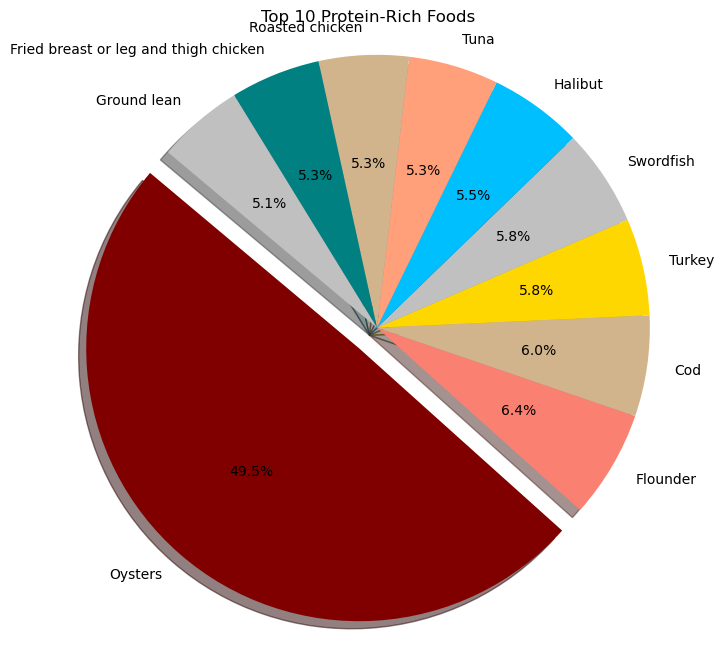

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.


In [66]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=meat.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: specify figure size
colors = ["maroon", "salmon", "tan", "gold", "silver", "deepskyblue", "lightsalmon", "tan", "teal", "silver"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Optional: explode a slice (e.g., Food A)
plt.pie(meats_top['Protein'], labels=meats_top['Food'], colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Add a title
plt.title('Top 10 Protein-Rich Foods')

# Display the chart
plt.show()

print("Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.")

***

#### Q6. Calculate the total fat content of all foods in the dataset.(redacted)
#### Q6. Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes.

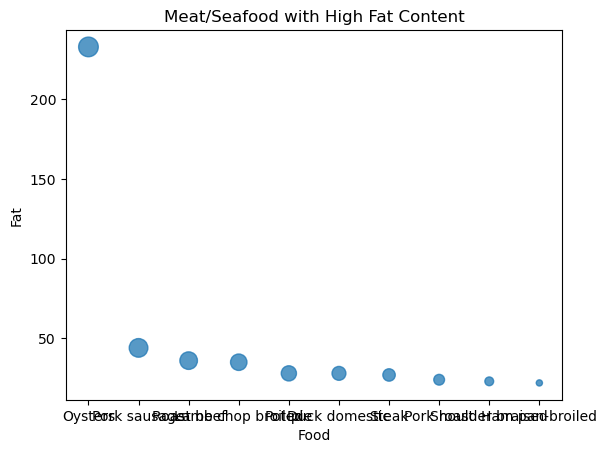

Hence Oysters has the most protein content!


In [67]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)

# Create a scatter plot
plt.scatter(top_10_fattest['Food'], top_10_fattest['Fat'], s=[200, 180, 160, 140, 120, 100, 80, 60, 40, 20], alpha=0.75)
plt.xlabel('Food')
plt.ylabel('Fat')
plt.title('Meat/Seafood with High Fat Content')

# Customize marker size and style (optional)
# You can adjust the marker size, color, and other properties as needed.

# Display the chart
plt.show()
top_protein_food = nutrients.loc[nutrients['Protein'].idxmax()]['Food']
print("Hence", top_protein_food, "has the most protein content!")

***

#### Q7. Find the ingredient which has the most protein to calorie ratio.

In [68]:
nutrients['Protein-to-Calorie Ratio'] = (nutrients['Protein'] / nutrients['Calories']).round(2)

# Find the food item with the highest protein-to-calorie ratio
highest_ratio_food = nutrients[nutrients['Protein-to-Calorie Ratio'] == nutrients['Protein-to-Calorie Ratio'].max()]

# Display the food item with the highest protein-to-calorie ratio
print("Food item with the highest protein-to-calorie ratio:")
print(highest_ratio_food[['Food', 'Protein-to-Calorie Ratio']])

Food item with the highest protein-to-calorie ratio:
      Food  Protein-to-Calorie Ratio
30  Butter                      1.01
31  Butter                      1.01


***

#### Q8. Kylie Jenner's daily diet is : Milk skim, Hydrogenated cooking fat, Cod, Red kidney, Bouillon. What percentage of the diet is composed of saturated fats?

In [69]:
# Define a list of selected food items
selected_food_items = ['Milk skim', 'Hydrogenated cooking fat', 'Cod', 'Red kidney', 'Bouillon']

# Filter the DataFrame to select only the chosen food items
selected_foods = nutrients[nutrients['Food'].isin(selected_food_items)]

# Calculate the total nutritional value for each nutrient
total_nutrition = selected_foods[['Calories', 'Protein', 'Carbs', 'Fat']].sum()

# Calculate the fat percentage
total_fat = total_nutrition['Fat']
total_calories = total_nutrition['Calories']
fat_percentage = (total_fat / total_calories) * 100

# Display the total nutritional value and fat percentage
print("Combined Nutritional Value for Selected Food Items:")
print(total_nutrition)
print(f"Fat Percentage: {fat_percentage:.2f}%")
print("Kylie Jenner's Saturated Fat percentage in her diet is {:.2f}%".format(fat_percentage))

Combined Nutritional Value for Selected Food Items:
Calories    1449.0
Protein       84.0
Carbs         94.0
Fat          106.0
dtype: float64
Fat Percentage: 7.32%
Kylie Jenner's Saturated Fat percentage in her diet is 7.32%


***

#### Q9. List foods that do not contain any common allergens (e.g., peanuts, tree nuts, dairy)

In [72]:
excluded_categories = ['Dairy products', 'Seeds and Nuts']

# Filter the DataFrame to exclude foods in the specified categories
filtered_foods = nutrients[~nutrients['Category'].isin(excluded_categories)]

# Display the filtered foods
print("Foods excluding Dairy and Nuts:")
print(filtered_foods[['Food', 'Category']])

Foods excluding Dairy and Nuts:
                         Food                 Category
28                      Yolks    Fats Oils Shortenings
29                     Butter    Fats Oils Shortenings
30                     Butter    Fats Oils Shortenings
31                     Butter    Fats Oils Shortenings
32   Hydrogenated cooking fat    Fats Oils Shortenings
..                        ...                      ...
330       Fruit-flavored soda  DrinksAlcohol Beverages
331                Ginger ale  DrinksAlcohol Beverages
332                 Root beer  DrinksAlcohol Beverages
333                    Coffee  DrinksAlcohol Beverages
334                       Tea  DrinksAlcohol Beverages

[291 rows x 2 columns]


#### Q10. Which according to your analysis is the healthiest food item/s for a teenager?

In [73]:
# Food items are considered healthy if they have fewer than 100 calories and less than 10 grams of fat.
healthy_foods = nutrients[(nutrients['Calories'] < 100) & (nutrients['Fat'] < 10)]

# Display a message indicating that the selected food items are considered healthy
print("Healthy Food Items:")

# Print the 'healthy_foods' DataFrame, which contains food items meeting the criteria
print(healthy_foods)

Healthy Food Items:
                                         Food     Measure  Grams  Calories  \
20                                    Cheddar  1-in. cube     17      70.0   
40                            French dressing        1 T.     15      60.0   
41                      Thousand Island sauce        1 T.     15      75.0   
43                                      Bacon    2 slices     16      95.0   
72                                      Clams       3 oz.     85      87.0   
..                                        ...         ...    ...       ...   
324                                       Gin       1 oz.     28      70.0   
327  Carbonated drinks Artificially sweetened      12 oz.    346       0.0   
328                                 Club soda      12 oz.    346       0.0   
333                                    Coffee       1 cup    230       3.0   
334                                       Tea       1 cup    230       4.0   

     Protein  Fat  Sat.Fat  Fiber  Carbs   

***